# Dynamic systems project


**Elisa Coceani, Tommaso Mingrone**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
from IPython import display
from matplotlib.animation import FuncAnimation
from matplotlib.lines import Line2D
from scipy.integrate import odeint

## Definition of the dynamic system

Consider the following dynamic system:

$$
\dot{x} = x(3 - ax - by)
$$

$$
\dot{y} = y(2 - x - y)
$$

which represents the competition for the same resources of a population of rabbits $(x)$ and sheep $(y)$. We assume that $a > 0$ is the inverse of the carrying capacity of the environment for rabbits and $b > 0$ the coefficient of competition of rabbits with sheep. In particular, consider the case $a = 2$ and $b = 1$. Using the numerical code, we study what happens when $a$ and $b$ vary in the interval $1 < a < 3$, $1 < b < 3$.

## Fixed points and variety analysis

Initially, the equilibrium points were identified and a study of their stability conducted. To identify the equilibrium points of the system, the equations $\dot{x} = 0$ and $\dot{y} = 0$ were solved simultaneously. Four equilibrium points were identified: $(0, 0)$, $(0, 2)$, $(1, 1)$, $(1.5, 0)$. Linearisation was then performed around these points in order to determine their stability by calculating the Jacobian matrix.


The matrix $A$ is defined as follows:

$$
A = \begin{bmatrix}
    -4x - y + 3 & -y \\
    -x & -x - 2y + 2
\end{bmatrix}
$$

It was then evaluated at each of the equilibrium points, specifically:

$$
A(0,0) = \begin{bmatrix}
3 & 0 \\
0 & 2
\end{bmatrix}
$$

$$
A(1, 1) = \begin{bmatrix}
-2 & -1 \\
-1 & -1
\end{bmatrix}
$$

$$
A(0,2) = \begin{bmatrix}
1 & -2 \\
0 & -2
\end{bmatrix}
$$

$$
A(1.5, 0) = \begin{bmatrix}
-3 & -\frac{3}{2} \\
0 & \frac{1}{2}
\end{bmatrix}
$$

Next, the eigenvalues of the associated matrix were determined, revealing two eigenvalues, $\lambda = 3$ and $\lambda = 2$, for the point $(0, 0)$. These eigenvalues indicate that the trajectories of the system are tangent to the direction corresponding to the smallest eigenvalue in terms of modulus, which in this case is $\lambda = 2$. Consequently, it was possible to classify the point $(0, 0)$ as an unstable node. Furthermore, the trajectories of the system were found to be tangent to the eigenvector associated with the eigenvalue $\lambda = 2$, i.e. $v = (0, 1)$.

As for the points $(0,2)$ and $(1.5,0)$, the corresponding eigenvalues were calculated as $\lambda = -2, 1$ and $\lambda = -3, \frac{1}{2}$, respectively. The difference in sign between these eigenvalues suggests that both of these points are saddle nodes.

Finally, the point $(1,1)$ has both negative eigenvalues, $\lambda = \frac{-3 - \sqrt{5}}{2},\frac{-3 + \sqrt{5}}{2}$, indicating that it is a stable node. During the analysis, isoclines were drawn, which are curves in which the derivative with respect to $x$ ($dot{x}$) or with respect to $y$ ($dot{y}$) is zero. These isoclines were found to be $y = 2 - x$, $y = 3 - 2x$, $x = 0$, and $y = 0$.

The analysis of the eigenvectors also made it possible to identify linear varieties in the vicinity of the fixed points. For each fixed point and eigenvalue, the following system of differential equations was solved:

$$
\left[
\begin{array}{cc}
\frac{\partial \dot{x}}{\partial x} - \lambda & \frac{\partial \dot{x}}{\partial y} \\
\frac{\partial \dot{y}}{\partial x} & \frac{\partial \dot{y}}{\partial y} - \lambda
\end{array}
\right]
\left[
\begin{array}{c}
v_1 \\
v_2
\end{array}
\right]
=
\left[
\begin{array}{c}
0 \\
0
\end{array}
\right]
$$

In [26]:
xmin,xmax = 0,2
ymin,ymax = 0,2.5
xlin = xlin=np.linspace(xmin,xmax,100)

# Runge-Kutta Algorithm
def rk4(f, y0, dt,tf):
    t = np.arange(0,tf,dt)
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        k1 = f(y[i])*dt
        k2 = f(y[i]+k1/2)*dt
        k3 = f(y[i]+k2/2)*dt
        k4 = f(y[i]+k3)*dt
        y[i+1] = y[i] +(k1 + 2*k2 + 2*k3 + k4)/6
    return y

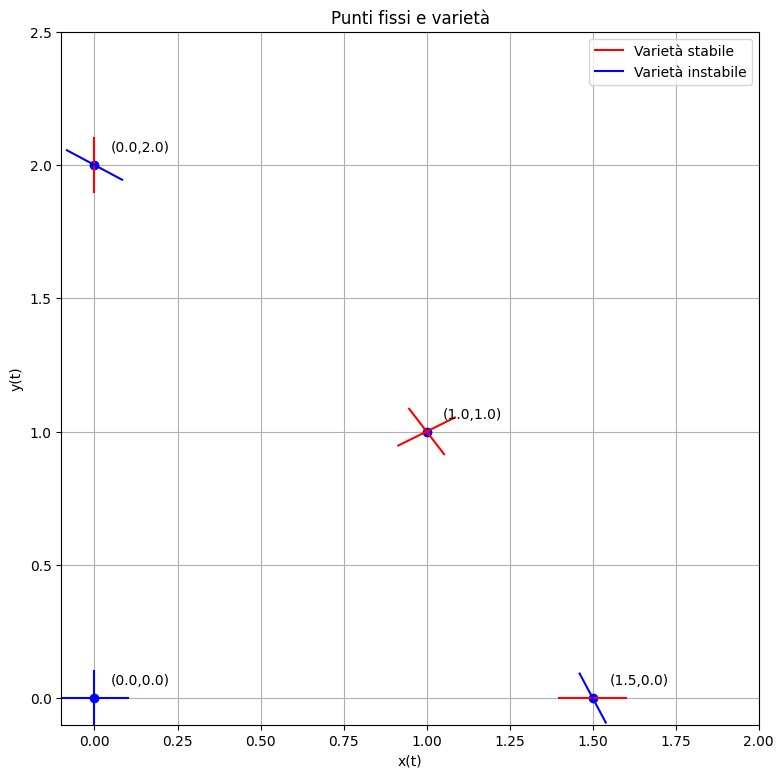

In [35]:
fp = np.array([[0,0],[0,2],[1.5,0],[1,1]])

J1 = np.array([[3,0],
               [0,2]])
J2 = np.array([[1,0],
               [-2,-2]])
J3 = np.array([[-3,-1.5],
               [0,0.5]])
J4 = np.array([[-2,-1],
               [-1,-1]])
              
e1,ev1=np.linalg.eig(J1)
e2,ev2=np.linalg.eig(J2) 
e3,ev3=np.linalg.eig(J3) 
e4,ev4=np.linalg.eig(J4)

scale_factor = .2

eigenvectors=[ev1,ev2,ev3,ev4]
eigenvalues=[e1,e2,e3,e4]

ev1*=.1
ev2*=.1
ev3*=.1
ev4*=.1


# Template 
plt.figure(figsize=(9,9))
plt.xlim(xmin-.1,xmax)
plt.ylim(ymin-.1,ymax)
plt.grid()
plt.title('Fixed points and variety')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
# Plot 
plt.plot(fp[:,0],fp[:,1],'bo')
for f in fp: plt.text(f[0]+.05,f[1]+.05,f'({f[0]},{f[1]})') 
# Manifold
for p,ev,e in zip(fp,[ev1,ev2,ev3,ev4],[e1,e2,e3,e4]):
    c1,c2 = 'red','red'
    if e[0] > 0: c1 = 'blue'
    if e[1] > 0: c2 = 'blue'
    plt.plot([p[0]-ev[0,0],p[0]+ev[0,0]],[p[1]-ev[1,0],p[1]+ev[1,0]],color=c1, label='x')
    plt.plot([p[0]-ev[0,1],p[0]+ev[0,1]],[p[1]-ev[1,1],p[1]+ev[1,1]],color=c2)

custom_lines = [Line2D([0], [0], color='red'),
                Line2D([0], [0], color='blue')]
plt.legend(custom_lines, ['Stable variety','Unstable variety'])

## Plotting of isoclines


Isoclines represent curves in the plane of state variables in which the derivative of one of these variables with respect to the other is zero. These lines offer a crucial indication of trends and interactions within the system.

In [ ]:
def xnc(x):
    return(2-x)
def ync(x):
    return(3-2*x)


# Template
plt.figure(figsize=(6,6))
plt.xlim(xmin-0.1,xmax)
plt.ylim(ymin-0.1,ymax)
plt.grid()
plt.title('Tracing isoclines')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
# Plot 
plt.plot(fp[:,0],fp[:,1],'bo')
# Labels
for f in fp: plt.text(f[0]+.05,f[1]+.05,f'({f[0]},{f[1]})') 
# Nullclines
plt.plot(xlin,xnc(xlin),'y--', label= 'y = 2-x')
plt.plot(xlin,ync(xlin),'b--', label='y = 3-2*x')
plt.plot([0,3],[0,0],'p--', label='y = 0')
plt.plot([0,0],[3,0],'r--', label='x = 0')
plt.legend()


## Vector field study

The fourth-order Runge-Kutta Method with a stepsize of 0.01 is used to study the vector field. This is a numerical technique used to approximate solutions of ordinary differential equations. In particular, the Fourth Order Method is known for its accuracy and efficiency in calculating solutions.

In particular, the Fourth Order Method is known for its accuracy and efficiency in calculating solutions.
To apply the Runge-Kutta Method, a sequence of values is generated for the x variable and the y variable. These initial values constitute the initial conditions for the system. Next, we implement the code required to perform the Runge-Kutta Method and calculate the desired solutions of the vector field.

In the following graphs, we highlight the isoclines and arrows of the vector field. In addition, some orbits around fixed points were plotted and a numerical study of the non-linear extension of stable and unstable varieties was conducted.

Next we study the expanding and contracting manifolds, which are used to understand how the trajectories of systems evolve over time. Expanding manifolds represent regions where trajectories diverge in time, while contracting manifolds indicate regions where trajectories converge.

/var/folders/_4/3vbd4hdn47j5tcm_svxls1lr0000gn/T/ipykernel_45833/2458749496.py:45: RuntimeWarning: invalid value encountered in divide
  fx /= flow_norm
/var/folders/_4/3vbd4hdn47j5tcm_svxls1lr0000gn/T/ipykernel_45833/2458749496.py:46: RuntimeWarning: invalid value encountered in divide
  fy /= flow_norm


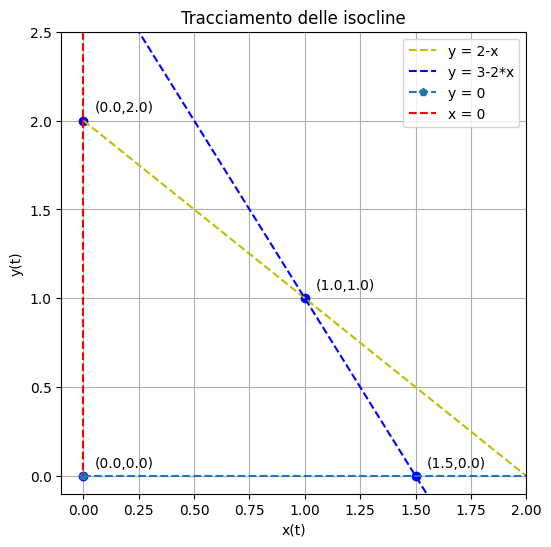

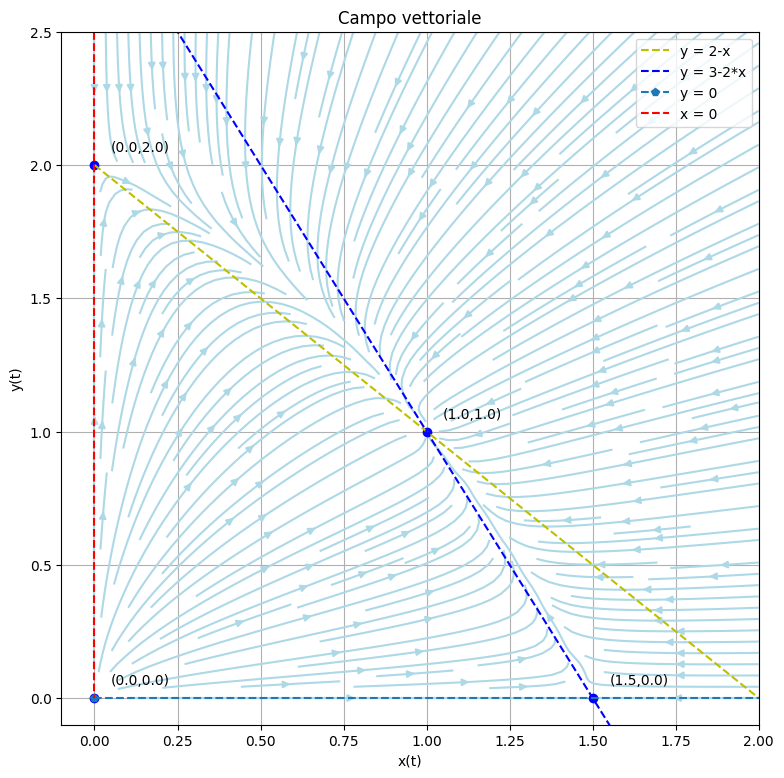

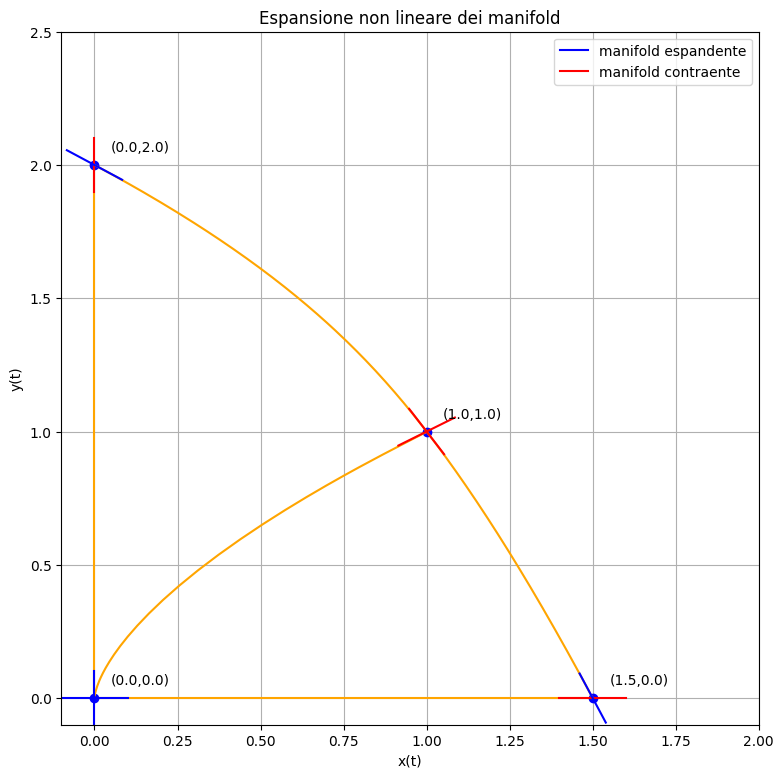

In [57]:

# Differential equation system
def ode(z):
    x=z[0]
    y=z[1]
    dx = x*(3-2*x-y)
    dy = y*(2-x-y)
    return np.array([dx,dy])

# Changing the vector field density
x,y = np.meshgrid(np.linspace(xmin,xmax,30),
                  np.linspace(ymin,ymax,30))
fx,fy = ode([x,y])

flow_norm = np.sqrt(fx **2 + fy **2)
fx /= flow_norm
fy /= flow_norm

# Graphic parameters
plt.figure(figsize=(9,9))
plt.xlim(xmin-0.1,xmax)
plt.ylim(ymin-0.1,ymax)
plt.grid()
plt.title('Vector field')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
# Phase potrait
plt.streamplot(x,y,fx,fy, density=2, color='lightblue')
# Plot fixed points
plt.plot(fp[:,0],fp[:,1],'bo')
for f in fp: plt.text(f[0]+.05,f[1]+.05,f'({f[0]},{f[1]})')
plt.plot(xlin,xnc(xlin),'y--', label='y = 2-x')
plt.plot(xlin,ync(xlin),'b--', label='y = 3-2*x')
plt.plot([0,3],[0,0],'p--', label='y = 0')
plt.plot([0,0],[3,0],'r--', label='x = 0')
plt.legend(loc='upper right')


# Graphic parameters
plt.figure(figsize=(9,9))
plt.xlim(xmin-.1,xmax)
plt.ylim(ymin-.1,ymax)
plt.grid()
plt.title('Non-linear expansion of manifolds')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
# Plot points
plt.plot(fp[:,0],fp[:,1],'bo')
for f in fp: plt.text(f[0]+.05,f[1]+.05,f'({f[0]},{f[1]})')

# Non-linear extension of manifolds
in_cond=np.array([[0,.01],
                    [0.001,0],
                    [0.001,.011],
                    [0.001,2-0.001],
                    [1.5-0.001,0.001]])
for y0 in in_cond:
   sol = rk4(ode, y0,.1,50)
   plt.plot(sol[:,0], sol[:, 1], 'orange')

# Manifold
for p,ev,e in zip(fp,[ev1,ev2,ev3,ev4],[e1,e2,e3,e4]):
    c1,c2 = 'red','red'
    if e[0] > 0: c1 = 'blue'
    if e[1] > 0: c2 = 'blue'
    plt.plot([p[0]-ev[0,0],p[0]+ev[0,0]],[p[1]-ev[1,0],p[1]+ev[1,0]],color=c1, label='x')
    plt.plot([p[0]-ev[0,1],p[0]+ev[0,1]],[p[1]-ev[1,1],p[1]+ev[1,1]],color=c2)

custom_lines = [Line2D([0], [0], color='blue'),
                Line2D([0], [0], color='red')]
plt.legend(custom_lines, ['expanding manifold','manifold contractor'])


## What happens when $a$ and $b$ vary?

In the continuation of the analysis, we proceed to observe the variations of the parameters representing the inverse of the carrying capacity of the environment for rabbits and the coefficient of competition of rabbits with sheep. This investigation is conducted by plotting the trajectories in the vector field using the Runge-Kutta method on an ongoing basis.
This approach makes it possible to explore in detail the impact of parameter variations on the dynamics of the system and to gain a broad understanding of its emergent behaviour.

In [ ]:
def g(x,y):
    return x * (3 - 2 * x - y)

def h(x,y):
    return y * (2 - x - y)
    

# Runge-Kutta Algorithm 
def RungeKuttaCoupled(t, x, y, dt, g, h, n_step):
    
    for i in (n_step):
        k1 = dt*g(t, x, y)
        h1 = dt*h(t, x, y)
        k2 = dt*g(t+dt/2., x+k1/2., y+h1/2.)
        h2 = dt*h(t+dt/2., x+k1/2., y+h1/2.)
        k3 = dt*g(t+dt/2., x+k2/2., y+h2/2.)
        h3 = dt*h(t+dt/2., x+k2/2., y+h2/2.)
        k4 = dt*g(t+dt, x+k3, y+h3)
        h4 = dt*h(t+dt, x+k3, y+h3)

        x = x + 1./6.*(k1+2*k2+2*k3+k4)
        y = y + 1./6.*(h1+2*h2+2*h3+h4)
        t = t + dt
    
        return t, x, y

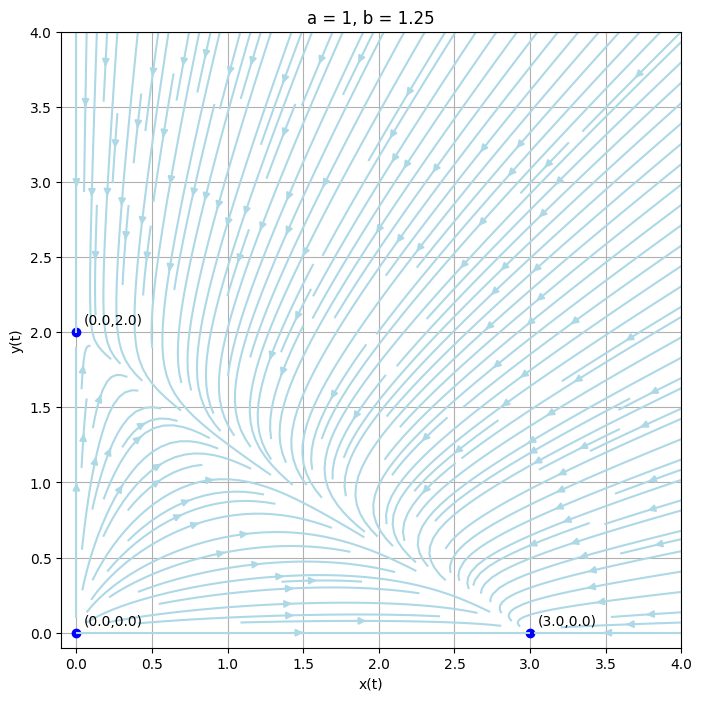

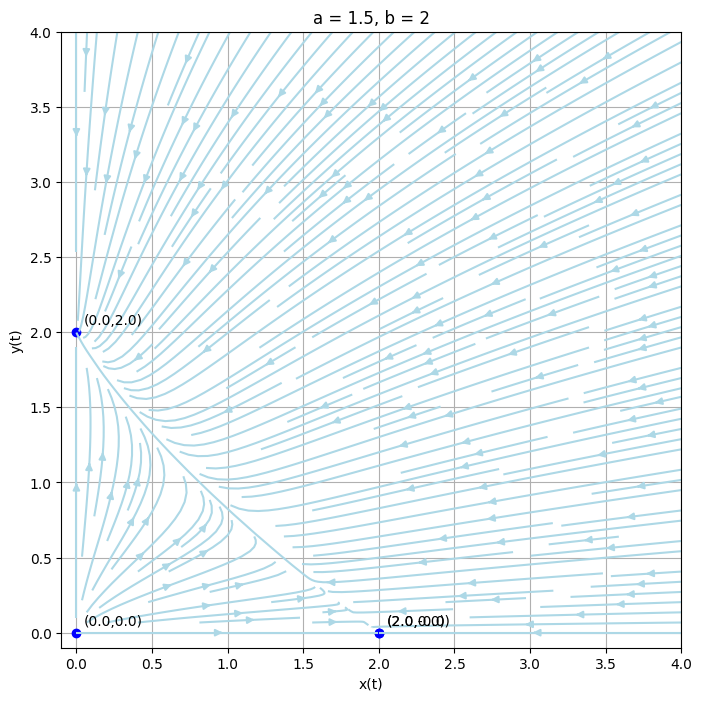

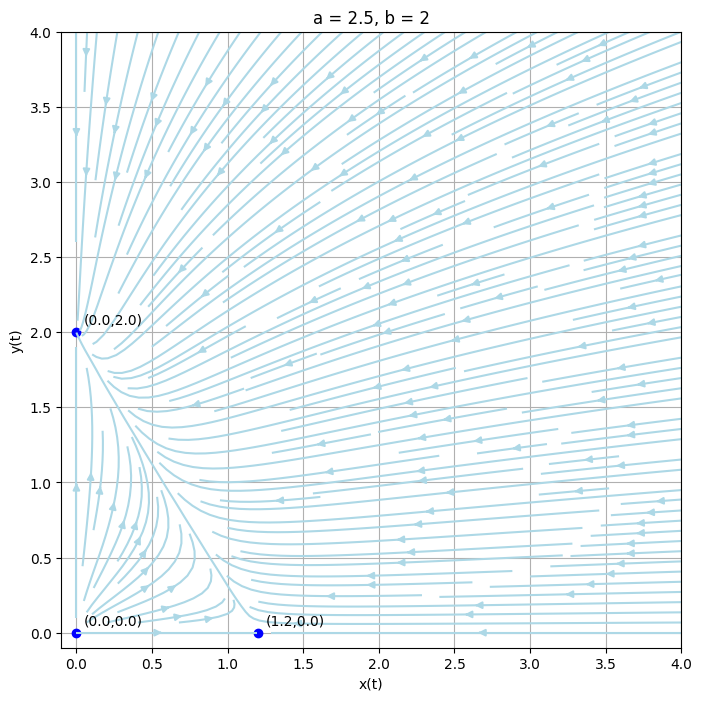

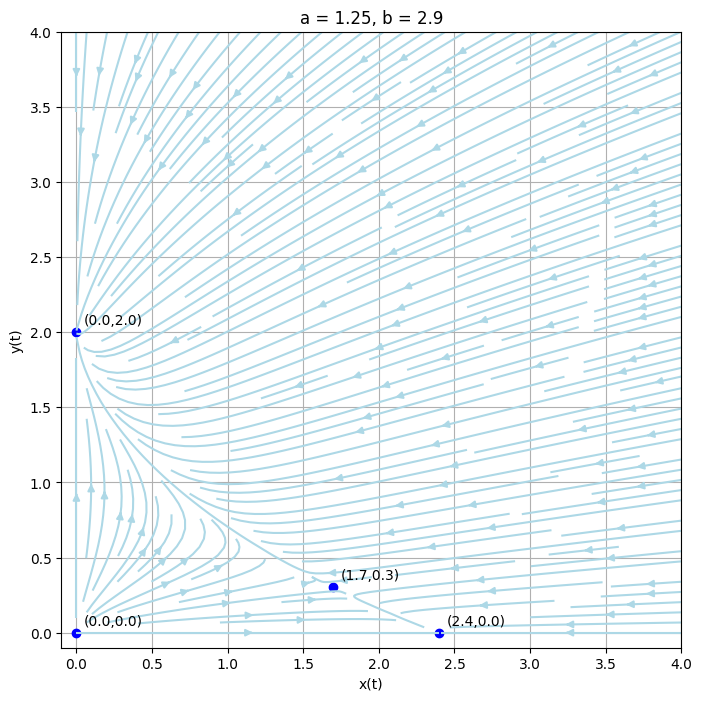

In [29]:
# Parameters
a,b=1,1.25
# Differential equation system with parameters
def odep(x,y,a,b):
    dx = x*(3-a*x-b*y)
    dy = y*(2-x-y)
    return np.array([dx,dy])

# Fixed points, if because x4 can give strange values
def fixed_points(a,b):
    x1=[0,0]
    x2=[0,2]
    x3=[3/a,0]
    x4=[(3-2*b)/(a-b),(2*a -3)/(a-b)]
    if x4[0]<0 or x4[1]<0:
        return np.array([x1,x2,x3])
    else: return np.array([x1,x2,x3,x4])


fpp = fixed_points(a,b)
xx,yy = np.meshgrid(np.linspace(0,4,30),
                  np.linspace(0,4,30))
fxx,fyy = odep(xx,yy,a,b)
# Graphic parameters
plt.figure(figsize=(8,8))
plt.xlim(-0.1,4)
plt.ylim(-0.1,4)
plt.grid()
plt.title(f'a = {a}, b = {b}')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
# Plot points
plt.plot(fpp[:,0],fpp[:,1],'bo')
for f in fpp: plt.text(f[0]+.05,f[1]+.05,f'({round(f[0],2)},{round(f[1],2)})')
# Phase potrait
plt.streamplot(xx,yy,fxx,fyy, density=2, color='lightblue')


# Parameters
a,b=1.5,2

def odep(x,y,a,b):
    dx = x*(3-a*x-b*y)
    dy = y*(2-x-y)
    return np.array([dx,dy])


def fixed_points(a,b):
    x1=[0,0]
    x2=[0,2]
    x3=[3/a,0]
    x4=[(3-2*b)/(a-b),(2*a -3)/(a-b)]
    if x4[0]<0 or x4[1]<0:
        return np.array([x1,x2,x3])
    else: return np.array([x1,x2,x3,x4])


fpp = fixed_points(a,b)
xx,yy = np.meshgrid(np.linspace(0,4,30),
                  np.linspace(0,4,30))
fxx,fyy = odep(xx,yy,a,b)

plt.figure(figsize=(8,8))
plt.xlim(-0.1,4)
plt.ylim(-0.1,4)
plt.grid()
plt.title(f'a = {a}, b = {b}')
plt.xlabel('x(t)')
plt.ylabel('y(t)')

plt.plot(fpp[:,0],fpp[:,1],'bo')
for f in fpp: plt.text(f[0]+.05,f[1]+.05,f'({round(f[0],2)},{round(f[1],2)})')

plt.streamplot(xx,yy,fxx,fyy, density=2, color='lightblue')



# Parameters
a,b=2.5,2

def odep(x,y,a,b):
    dx = x*(3-a*x-b*y)
    dy = y*(2-x-y)
    return np.array([dx,dy])


def fixed_points(a,b):
    x1=[0,0]
    x2=[0,2]
    x3=[3/a,0]
    x4=[(3-2*b)/(a-b),(2*a -3)/(a-b)]
    if x4[0]<0 or x4[1]<0:
        return np.array([x1,x2,x3])
    else: return np.array([x1,x2,x3,x4])

fpp = fixed_points(a,b)
xx,yy = np.meshgrid(np.linspace(0,4,30),
                  np.linspace(0,4,30))
fxx,fyy = odep(xx,yy,a,b)

plt.figure(figsize=(8,8))
plt.xlim(-0.1,4)
plt.ylim(-0.1,4)
plt.grid()
plt.title(f'a = {a}, b = {b}')
plt.xlabel('x(t)')
plt.ylabel('y(t)')

plt.plot(fpp[:,0],fpp[:,1],'bo')
for f in fpp: plt.text(f[0]+.05,f[1]+.05,f'({round(f[0],2)},{round(f[1],2)})')

plt.streamplot(xx,yy,fxx,fyy, density=2, color='lightblue')


# Parameters
a,b=1.25,2.90

def odep(x,y,a,b):
    dx = x*(3-a*x-b*y)
    dy = y*(2-x-y)
    return np.array([dx,dy])


def fixed_points(a,b):
    x1=[0,0]
    x2=[0,2]
    x3=[3/a,0]
    x4=[(3-2*b)/(a-b),(2*a -3)/(a-b)]
    if x4[0]<0 or x4[1]<0:
        return np.array([x1,x2,x3])
    else: return np.array([x1,x2,x3,x4])

fpp = fixed_points(a,b)
xx,yy = np.meshgrid(np.linspace(0,4,30),
                  np.linspace(0,4,30))
fxx,fyy = odep(xx,yy,a,b)

plt.figure(figsize=(8,8))
plt.xlim(-0.1,4)
plt.ylim(-0.1,4)
plt.grid()
plt.title(f'a = {a}, b = {b}')
plt.xlabel('x(t)')
plt.ylabel('y(t)')

plt.plot(fpp[:,0],fpp[:,1],'bo')
for f in fpp: plt.text(f[0]+.05,f[1]+.05,f'({round(f[0],2)},{round(f[1],2)})')

plt.streamplot(xx,yy,fxx,fyy, density=2, color='lightblue')

[a = 1,b = 1.25],[a = 1.5,b = 2]: The parameter represents the inverse of the carrying capacity of the environment for rabbits. Thus a small value of a indicates that the environment can support a larger rabbit population before it reaches its limit.

[ a = 2.5, b = 2 ]:With these values, it is likely that, in the long run, sheep (y) will gradually outnumber rabbits (x) unless initial conditions favourable to rabbits are very pronounced.In any case, the two groups are expected to coexist with similar population levels.
[ a = 1.25, b = 2.9 ]: Under the specified conditions, with the exception of marginal cases where the initial population of sheep is zero, there is a tendency for sheep to predominate over rabbits. This preponderance continues until an equilibrium state characterised by a stable sheep population and the absence of rabbits is reached.